<a href="https://colab.research.google.com/github/thdhyan/StockHack2025/blob/main/stockhack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mplfinance
!pip install alpha_vantage
!pip install alpaca-py

In [37]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import TimeFrame
from tqdm import tqdm

# Replace these with your Alpaca API credentials
API_KEY = "PK4WF9YT0IMTLY2G3X7J"
API_SECRET = "ImR8gLKbsOZ0z1laPcssKtyPouD0qJeKgYFhYDYq"

# Initialize Alpaca API
api = tradeapi.REST(API_KEY, API_SECRET, base_url="https://paper-api.alpaca.markets", api_version="v2")

# Loading Data


Stocks:

Celsius Holdings, Inc. (CELH)

Carvana Co. (CVNA)

Upstart Holdings, Inc. (UPST)

Altimmune, Inc. (ALT)

FuboTV Inc. (FUBO)

In [82]:
tickers = ['CVNA', 'CELH', 'UPST', 'ALT', 'FUBO']

In [121]:

def get_stock_data(ticker, start="2020-01-01", end="2025-01-01", timeframe=TimeFrame.Hour):
    api = tradeapi.REST(API_KEY, API_SECRET, base_url="https://paper-api.alpaca.markets", api_version="v2")
    bars = api.get_bars(ticker, timeframe, start=start, end=end).df
    return bars

dfs = {}
for ticker in tqdm(tickers):
    df = get_stock_data(ticker)
    dfs[ticker] = df

100%|██████████| 5/5 [00:56<00:00, 11.21s/it]


In [140]:
for ticker, df in dfs.items():
    print(f"{ticker}: {df.shape}")
    #Download csv
    df.to_csv(f"{ticker}.csv")


CVNA: (16244, 7)
CELH: (14282, 7)
UPST: (15384, 7)
ALT: (14666, 7)
FUBO: (16243, 7)


In [141]:
from google.colab import files

for ticker in tickers:
    files.download(f"{ticker}.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
from sklearn.model_selection import TimeSeriesSplit

n_splits = 5  # Number of folds
tscv = TimeSeriesSplit(n_splits=n_splits)

X = dfs[tickers[0]]  # Assuming X has a datetime index

for fold, (train_idx, test_idx) in enumerate(tscv.split(X)):
    train_start = X.index[train_idx[0]].date()
    train_end = X.index[train_idx[-1]].date()
    test_start = X.index[test_idx[0]].date()
    test_end = X.index[test_idx[-1]].date()

    train_days = (train_end - train_start).days + 1
    test_days = (test_end - test_start).days + 1

    print(f"Fold {fold}:")
    print(f"  Train from {train_start} up to {train_end} ({train_days} days)")
    print(f"  Test from {test_start} to {test_end} ({test_days} days)")
    print("-" * 50)
    X_train = X.iloc[train_idx]
    X_test = X.iloc[test_idx]
    print(X_train.shape, X_test.shape)


Fold 0:
  Train from 2022-01-03 up to 2022-07-27 (206 days)
  Test from 2022-07-27 to 2023-01-13 (171 days)
--------------------------------------------------
(64500, 7) (64497, 7)
Fold 1:
  Train from 2022-01-03 up to 2023-01-13 (376 days)
  Test from 2023-01-13 to 2023-06-14 (153 days)
--------------------------------------------------
(128997, 7) (64497, 7)
Fold 2:
  Train from 2022-01-03 up to 2023-06-14 (528 days)
  Test from 2023-06-14 to 2023-11-24 (164 days)
--------------------------------------------------
(193494, 7) (64497, 7)
Fold 3:
  Train from 2022-01-03 up to 2023-11-24 (691 days)
  Test from 2023-11-24 to 2024-05-30 (189 days)
--------------------------------------------------
(257991, 7) (64497, 7)
Fold 4:
  Train from 2022-01-03 up to 2024-05-30 (879 days)
  Test from 2024-05-30 to 2025-01-01 (217 days)
--------------------------------------------------
(322488, 7) (64497, 7)


In [126]:
def remove_stagnation(df, price_col='close', threshold=5):

    df = df.copy()
    df['price_change'] = df[price_col].diff().fillna(-1)
    df['stagnant'] = df['price_change'] == -1
    df['stagnation_group'] = (df['stagnant'] != df['stagnant'].shift()).cumsum()
    stagnation_counts = df.groupby('stagnation_group')['stagnant'].transform('sum')
    df = df[~((df['stagnant']) & (stagnation_counts >= threshold))]
    df = df.drop(columns=['price_change', 'stagnant', 'stagnation_group'])

    return df

# Visualizations


In [133]:
def plot_stock_price(df, ticker_name):
    df['open'].plot(figsize=(12, 6), title=f"{ticker_name} Stock Price")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.show()

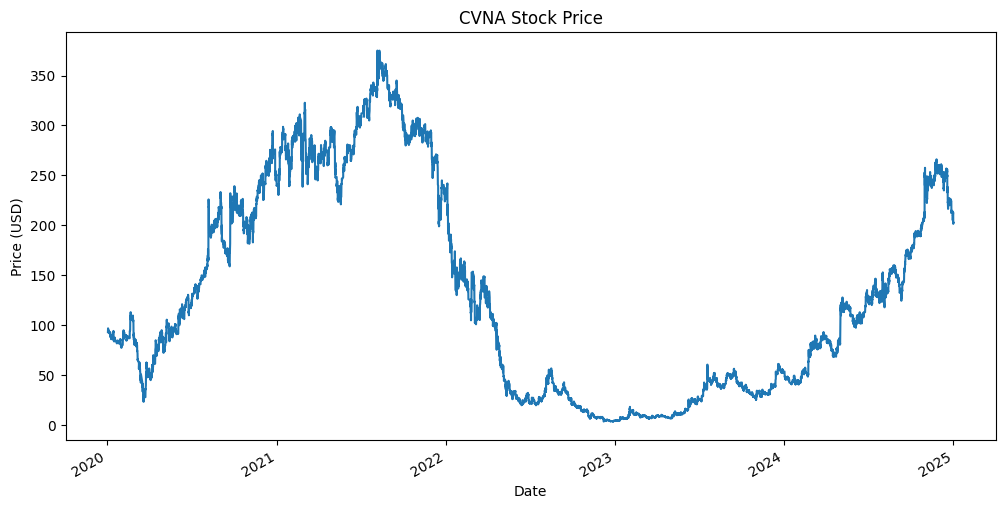

In [134]:
plot_stock_price(remove_stagnation(dfs[tickers[0]]), tickers[0])

In [135]:
dfs['ALT'].iloc[1000]

,2020-05-13 16:00:00+00:00
close,4.010000
high,4.160000
low,3.900000
trade_count,2487.000000
open,4.149900
volume,669735.000000
vwap,4.046976


In [139]:
#2 Index Fund, Nasdac, Natural Resource

14*8*21


# 1 sample 2 weeks


2352